In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [184]:
names1880=pd.read_csv(r"babynames\yob1880.txt",names=["names","sex","births"])

In [186]:
names1880

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [188]:
In [109]: names1880.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
#to assemble all the years of the datas 

In [394]:
pieces=[]
for year in range(1880,2010):
    path=f"babynames/yob{year}.txt"
    frame=pd.read_csv(path,names=["names","sex","births"])
    frame["year"]=year
    pieces.append(frame)
names=pd.concat(pieces,ignore_index=True)    

In [396]:
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1656941,Zyquarius,M,5,2009
1656942,Zyran,M,5,2009
1656943,Zyreion,M,5,2009
1656944,Zyrian,M,5,2009


In [8]:
#now with this data in hand we can already start aggregating the data using groupby or pivot

In [398]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc="sum")

In [400]:
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2005,1843890,1993285
2006,1896468,2050234
2007,1916888,2069242


<Axes: title={'center': 'total births by sex and year'}, xlabel='year'>

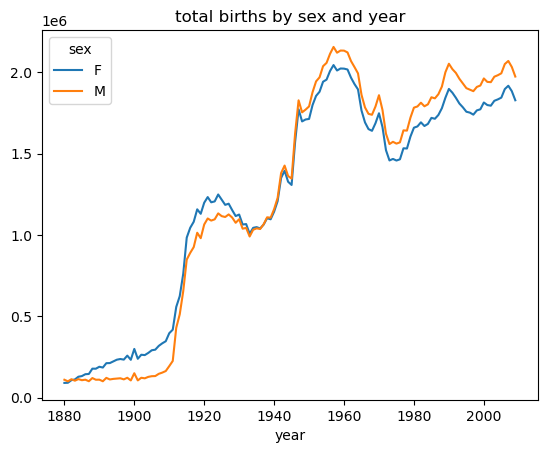

In [402]:
total_births.plot(title="total births by sex and year")

In [12]:
#now let's insert a columns with the relative percentage of names

In [404]:
names

,names,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1656941,Zyquarius,M,5,2009
1656942,Zyran,M,5,2009
1656943,Zyreion,M,5,2009
1656944,Zyrian,M,5,2009


In [406]:
names["prop"] = names.groupby(["year", "sex"])["births"].transform(lambda x: x / x.sum())

In [408]:
In [122]: names = names.reset_index(drop=True)

In [410]:
names

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1656941,Zyquarius,M,5,2009,0.000003
1656942,Zyran,M,5,2009,0.000003
1656943,Zyreion,M,5,2009,0.000003
1656944,Zyrian,M,5,2009,0.000003


In [412]:
In [117]: names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2007  M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
Name: prop, Length: 260, dtype: float64

In [414]:
top1000 = (
    names.sort_values(by=["year", "sex", "births"], ascending=[True, True, False])
    .groupby(["year", "sex"])
    .head(1000)
)

In [416]:
top1000

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1643462,Stone,M,197,2009,0.000100
1643463,Trevin,M,197,2009,0.000100
1643464,Tyshawn,M,197,2009,0.000100
1643465,Amos,M,196,2009,0.000099


In [374]:
names[431022:431023]

,names,sex,births,year,prop
431022,Linda,F,99651,1947,0.056229


In [418]:
top1000

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1643462,Stone,M,197,2009,0.000100
1643463,Trevin,M,197,2009,0.000100
1643464,Tyshawn,M,197,2009,0.000100
1643465,Amos,M,196,2009,0.000099


In [420]:
In [124]: boys = top1000[top1000["sex"] == "M"]
In [125]: girls = top1000[top1000["sex"] == "F"]

In [422]:
boys

,names,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
1643462,Stone,M,197,2009,0.000100
1643463,Trevin,M,197,2009,0.000100
1643464,Tyshawn,M,197,2009,0.000100
1643465,Amos,M,196,2009,0.000099


In [28]:
girls

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
258872,Lilyanna,F,265,2009,0.000145
258873,Samiyah,F,265,2009,0.000145
258874,Sydnee,F,265,2009,0.000145
258875,Mireya,F,264,2009,0.000144


In [426]:
In [126]: total_births = top1000.pivot_table("births", index="year",columns="names",aggfunc="sum")

In [428]:
total_births

names,Aaden,Aaliyah,Aarav,Aaron,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,5.0,NaN,NaN,NaN,71.0,NaN,...,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,81.0,NaN,...,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0
1882,NaN,NaN,NaN,85.0,5.0,NaN,NaN,NaN,80.0,NaN,...,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,79.0,NaN,...,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0
1884,NaN,NaN,NaN,97.0,NaN,NaN,5.0,NaN,98.0,NaN,...,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,NaN,3452.0,NaN,7796.0,NaN,287.0,NaN,451.0,445.0,600.0,...,NaN,NaN,4953.0,2266.0,502.0,NaN,NaN,NaN,NaN,NaN
2006,NaN,3737.0,NaN,8279.0,NaN,297.0,NaN,404.0,440.0,630.0,...,NaN,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,313.0,NaN,349.0,468.0,651.0,...,NaN,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN


In [31]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 1880 to 2009
Columns: 6814 entries, Aaden to Zula
dtypes: float64(6814)
memory usage: 6.8 MB


In [32]:
In [128]: subset = total_births[["John", "Harry", "Mary", "Marilyn","William"]]

In [33]:
subset

names,John,Harry,Mary,Marilyn,William
year,,,,,
1880,9701.0,2158.0,7092.0,NaN,9563.0
1881,8795.0,2002.0,6948.0,NaN,8554.0
1882,9597.0,2246.0,8179.0,NaN,9329.0
1883,8934.0,2116.0,8044.0,NaN,8427.0
1884,9427.0,2338.0,9253.0,NaN,8931.0
...,...,...,...,...,...
2005,15747.0,459.0,4439.0,511.0,19025.0
2006,15140.0,414.0,4073.0,596.0,18915.0
2007,14405.0,443.0,3665.0,597.0,18839.0


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>], dtype=object)

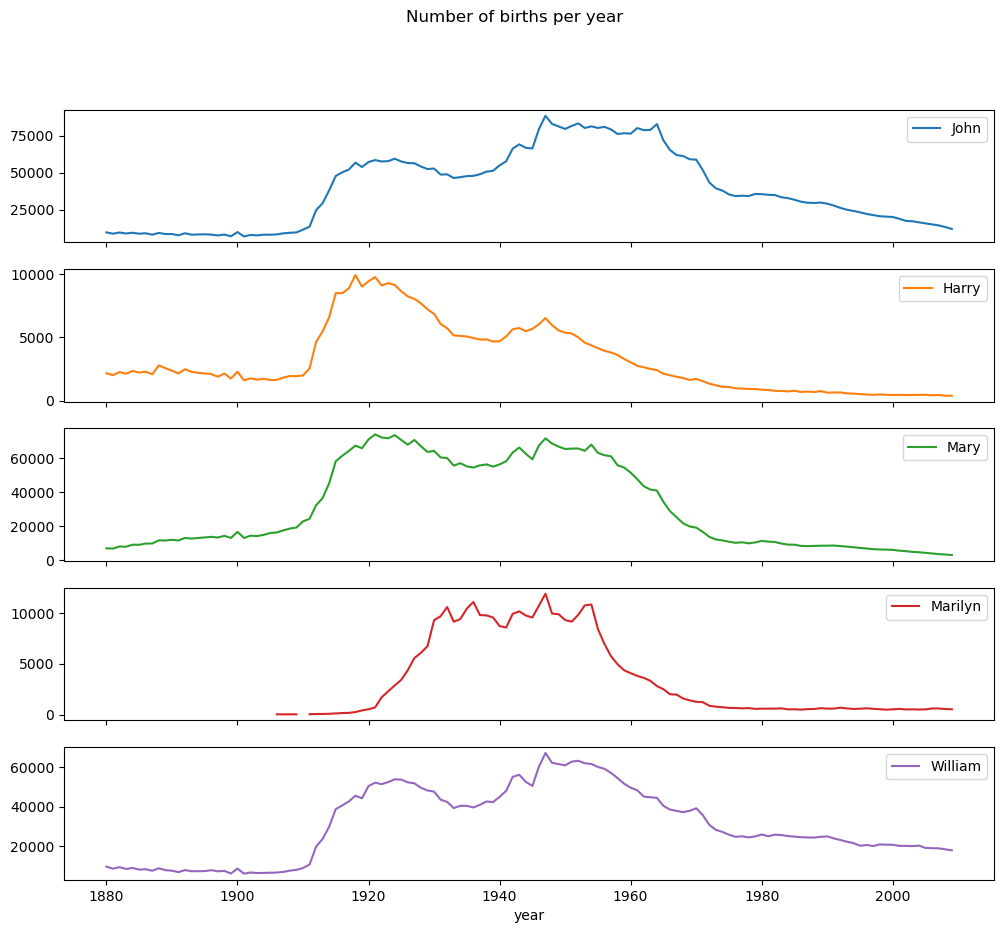

In [34]:
In [129]: subset.plot(subplots=True, figsize=(12, 10),
.....: title="Number of births per year")

In [35]:
#Measuring the increase in naming diversity

In [430]:
In [131]: table = top1000.pivot_table("prop", index="year",
.....: columns="sex", aggfunc="sum")

In [432]:
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2005,0.762426,0.866514
2006,0.753153,0.860368
2007,0.745959,0.855159


<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

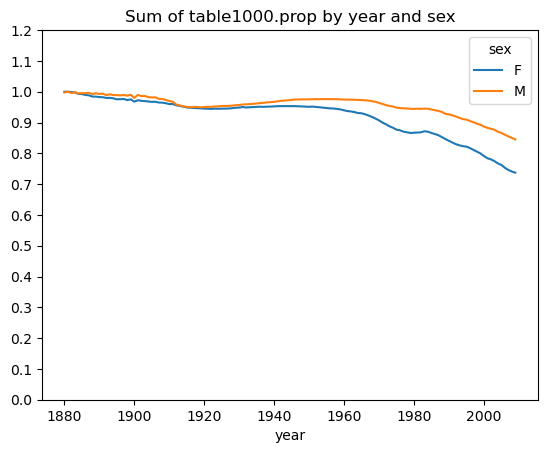

In [38]:
In [132]: table.plot(title="Sum of table1000.prop by year and sex", yticks=np.linspace(0, 1.2, 13))

In [39]:
#You can see that, indeed, there appears to be increasing name diversity (decreasing
#total proportion in the top one thousand). Another interesting metric is the number
#of distinct names, taken in order of popularity from highest to lowest, in the top 50%
#of births. This number is trickier to compute. Let’s consider just the boy names from 2010

In [448]:
In [133]: df = boys[boys["year"] == 2009]

In [450]:
df

,names,sex,births,year,prop
1642467,Jacob,M,21036,2009,0.010660
1642468,Ethan,M,19783,2009,0.010025
1642469,Michael,M,18822,2009,0.009538
1642470,Alexander,M,18175,2009,0.009210
1642471,William,M,17852,2009,0.009047
...,...,...,...,...,...
1643462,Stone,M,197,2009,0.000100
1643463,Trevin,M,197,2009,0.000100
1643464,Tyshawn,M,197,2009,0.000100
1643465,Amos,M,196,2009,0.000099


In [456]:
In [135]: prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()

In [458]:
prop_cumsum[:10]

1642467    0.010660
1642468    0.020685
1642469    0.030223
1642470    0.039433
1642471    0.048480
1642472    0.057373
1642473    0.066219
1642474    0.074931
1642475    0.083635
1642476    0.091877
Name: prop, dtype: float64

In [44]:
#we want to know how many of the most popular names it takes to reach 50%

In [46]:
prop_cumsum.searchsorted(0.5)

113

In [460]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [48]:
#so as we can see the difference is obvious between the year of 1900 and the year of 2009 in terms
#of names diversty

In [49]:
def get_quantile_count(group,q=0.5):
    group=group.sort_values("prop",ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

In [464]:
diversity=top1000.groupby(["year", "sex"]).apply(get_quantile_count,include_groups=False)

In [468]:
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2007  M      103
2008  F      234
      M      109
2009  F      241
      M      114
Length: 260, dtype: int64

In [52]:
diversity=diversity.unstack()

In [53]:
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2005,199,96
2006,209,99
2007,223,103


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

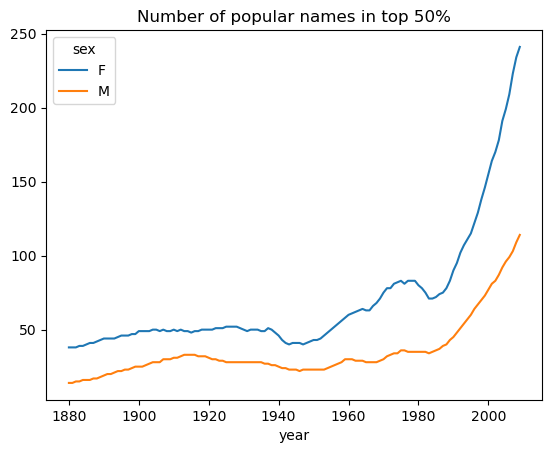

In [54]:
In [144]: diversity.plot(title="Number of popular names in top 50%")

In [55]:
#As you can see, girl names have always been more diverse than boy names, and they
#have only become more so over time. Further analysis of what exactly is driving the
#diversity, like the increase of alternative spellings, is left to the reader.

In [56]:
#The “last letter” revolution

In [57]:
def get_last_letter(x):
    return x[-1]
last_letters = names["names"].map(get_last_letter)

In [58]:
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1656941    s
1656942    n
1656943    n
1656944    n
1656945    n
Name: names, Length: 1656946, dtype: object

In [59]:
last_letters.name="last_letter"

In [60]:
names

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1656941,Zyquarius,M,5,2009,0.000003
1656942,Zyran,M,5,2009,0.000003
1656943,Zyreion,M,5,2009,0.000003
1656944,Zyrian,M,5,2009,0.000003


In [470]:
table = names.pivot_table("births", index=last_letters,columns=["sex", "year"], aggfunc="sum")

In [62]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2000      2001      2002   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   40837.0   39124.0   38815.0   
b                NaN      NaN      NaN  ...   50892.0   50950.0   49284.0   
c                NaN      NaN      NaN  ...   26998.0   27113.0   27238.0   
d             1027.0   1298.0   1374.0  ...   64251.0   60838.0   55829.0   
e            54353.0  66750.0  66663.0  ...  148821.0  145395.0  144651.0   
f                NaN      NaN      NaN  ...    1715.0    1758.0    1817.0   
g               25.0     44.0     28.0  ...    2400.0    2151.0    2084.0   
h             7141.0   8630.0   8826.0  ...   85031.0   85959.0   88085.0   
i              105.0    141.0    134.0  ...   18320.0   20980.0   23610.0   
j                NaN      NaN      NaN  ...     919.0    1069.0    1088.0   
k               19.0     21.0     22.0  ...   44515.0   42477.0   42043.0   
l             6175.0   7900.0   8395.0  ...  155285.0  153648.0  153493.0   
m               90.0    123.0    137.0  ...   41431.0   41967.0   42663.0   
n             5512.0   6833.0   7103.0  ...  614130.0  616099.0  630322.0   
o               97.0    134.0    142.0  ...   80520.0   82146.0   83180.0   
p                NaN      NaN      NaN  ...    3550.0    3419.0    3157.0   
q                NaN      NaN      NaN  ...     700.0     602.0     618.0   
r              910.0   1207.0   1214.0  ...  169479.0  165377.0  164821.0   
s             2803.0   3582.0   3569.0  ...  145872.0  143791.0  139595.0   
t             3140.0   3816.0   3784.0  ...

In [63]:
In [146]: subtable = table.reindex(columns=[1910, 1960, 2009], level="year")

In [64]:
subtable

sex                 F                            M                    
year             1910      1960      2009     1910      1960      2009
last_letter                                                           
a            108376.0  691247.0  698477.0    977.0    5204.0   31430.0
b                 NaN     694.0     435.0    411.0    3912.0   38862.0
c                 5.0      49.0     931.0    482.0   15476.0   24048.0
d              6750.0    3729.0    2864.0  22111.0  262112.0   46172.0
e            133569.0  435013.0  322682.0  28655.0  178823.0  135496.0
f                 NaN      20.0      82.0    152.0    9224.0    2212.0
g                57.0     318.0     486.0    437.0   20235.0    2396.0
h             20427.0   73247.0  137378.0   8848.0   80841.0   99979.0
i               605.0   80812.0   55974.0    164.0    1286.0   40912.0
j                 NaN       NaN     179.0      NaN       NaN    1416.0
k                48.0     315.0     594.0   7104.0  105315.0   37507.0
l             17121.0   68482.0   49268.0  12626.0  223716.0  143751.0
m               476.0   17417.0    4313.0  11272.0   72139.0   46278.0
n             31412.0  264258.0  260674.0  27851.0  325266.0  715388.0
o               658.0    4932.0    2367.0   3314.0   27358.0   86423.0
p                 7.0      47.0      33.0    616.0   12102.0    2595.0
q                 NaN       NaN      61.0      NaN       NaN     377.0
r              5308.0   13677.0   33218.0  12522.0   66183.0  173200.0
s             15477.0   25810.0   26440.0  25404.0  219080.0  129861.0
t             10877.0   30738.0   12714.0  14153.0  140015.0   43674.0
u               271.0    1161.0     724.0     24.0     122.0    2417.0
v                 NaN     122.0     186.0     22.0      78.0    2589.0
w                 8.0      63.0    1994.0   1229.0   16444.0   33181.0
x                 6.0      74.0    1144.0    770.0    3947.0   16640.0
y             43991.0  308504.0  213092.0  15021.0  343318.0  112922.0
z               967.0    1333.0    1333.0     33.0     392.0    3633.0

In [65]:
#Next, normalize the table by total births to compute a new table containing the
#proportion of total births for each sex ending in each letter:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2009    1827643.0
M    1910     194198.0
     1960    2132588.0
     2009    1973359.0
dtype: float64

In [66]:
In [149]: letter_prop = subtable / subtable.sum()

In [67]:
letter_prop

sex                 F                             M                    
year             1910      1960      2009      1910      1960      2009
last_letter                                                            
a            0.273390  0.341853  0.382174  0.005031  0.002440  0.015927
b                 NaN  0.000343  0.000238  0.002116  0.001834  0.019693
c            0.000013  0.000024  0.000509  0.002482  0.007257  0.012186
d            0.017028  0.001844  0.001567  0.113858  0.122908  0.023398
e            0.336941  0.215133  0.176556  0.147556  0.083853  0.068663
f                 NaN  0.000010  0.000045  0.000783  0.004325  0.001121
g            0.000144  0.000157  0.000266  0.002250  0.009488  0.001214
h            0.051529  0.036224  0.075167  0.045562  0.037907  0.050664
i            0.001526  0.039965  0.030626  0.000844  0.000603  0.020732
j                 NaN       NaN  0.000098       NaN       NaN  0.000718
k            0.000121  0.000156  0.000325  0.036581  0.049384  0.019007
l            0.043189  0.033867  0.026957  0.065016  0.104904  0.072846
m            0.001201  0.008613  0.002360  0.058044  0.033827  0.023451
n            0.079240  0.130687  0.142629  0.143415  0.152522  0.362523
o            0.001660  0.002439  0.001295  0.017065  0.012829  0.043795
p            0.000018  0.000023  0.000018  0.003172  0.005675  0.001315
q                 NaN       NaN  0.000033       NaN       NaN  0.000191
r            0.013390  0.006764  0.018175  0.064481  0.031034  0.087769
s            0.039042  0.012764  0.014467  0.130815  0.102730  0.065807
t            0.027438  0.015201  0.006957  0.072879  0.065655  0.022132
u            0.000684  0.000574  0.000396  0.000124  0.000057  0.001225
v                 NaN  0.000060  0.000102  0.000113  0.000037  0.001312
w            0.000020  0.000031  0.001091  0.006329  0.007711  0.016814
x            0.000015  0.000037  0.000626  0.003965  0.001851  0.008432
y            0.110972  0.152569  0.116594  0.077349  0.160987  0.057223
z            0.002439  0.000659  0.000729  0.000170  0.000184  0.001841

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

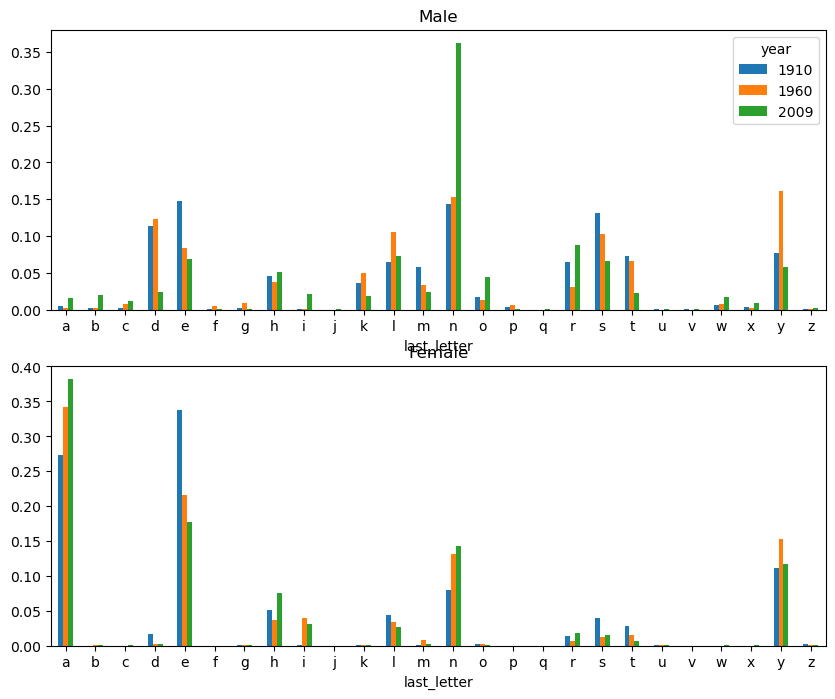

In [68]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",legend=False)

In [69]:
#here we gonna normalize again by the year, by doing so we get the names last letter percentage of the total names
#last letter per year, in order to plot a time serie for each of 3 letters

In [70]:
In [153]: letter_prop = table / table.sum()

In [71]:
In [154]: dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T

In [72]:
dny_ts

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
...,...,...,...
2005,0.025420,0.344319,0.062806
2006,0.025075,0.351666,0.060338
2007,0.024451,0.358274,0.059634


<Axes: xlabel='year'>

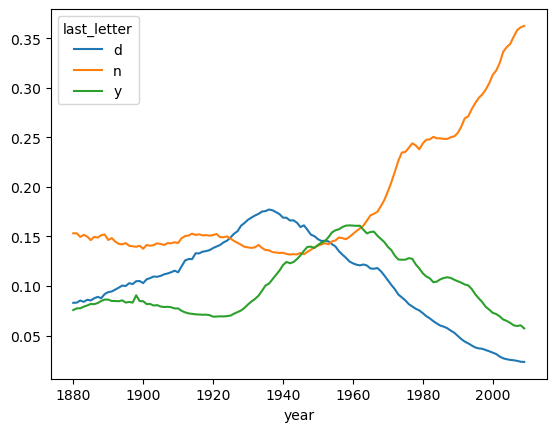

In [73]:
In [158]: dny_ts.plot()

In [74]:
#Figure 13-9. Proportion of boys born with names ending in d/n/y over time

In [75]:
#boy names that became girls names and vice versa

In [76]:
In [159]: all_names = pd.Series(top1000["names"].unique())
In [160]: lesley_like = all_names[all_names.str.contains("Lesl")]

In [77]:
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6809        Juelz
6810       Jaycob
6811        Kalel
6812       Maddux
6813       Zavion
Length: 6814, dtype: object

In [78]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [79]:
In [162]: filtered = top1000[top1000["names"].isin(lesley_like)]

In [80]:
filtered

,names,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
254693,Lesley,F,351,2007,0.000183
256023,Leslie,F,2323,2008,0.001233
256327,Lesly,F,699,2008,0.000371
258036,Leslie,F,1975,2009,0.001081


In [81]:
In [163]: filtered.groupby("names")["births"].sum()

names
Leslee      1082
Lesley     35022
Lesli        929
Leslie    368871
Lesly       9565
Name: births, dtype: int64

In [82]:
#Next, let’s aggregate by sex and year, and normalize within year:
In [164]: table = filtered.pivot_table("births", index="year",columns="sex", aggfunc="sum")

In [83]:
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2005,4284.0,NaN
2006,4166.0,NaN
2007,3805.0,NaN


In [84]:
In [165]: table = table.div(table.sum(axis="columns"), axis="index")

In [85]:
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2005,1.000000,NaN
2006,1.000000,NaN
2007,1.000000,NaN


In [86]:
#now we make a plot showing the decline of the leslie name use for boys over time

<Axes: xlabel='year'>

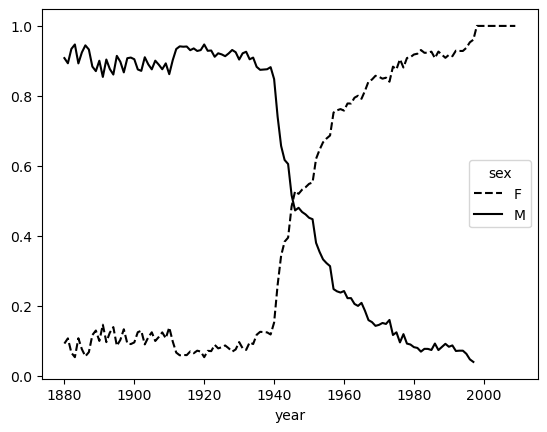

In [87]:
In [168]: table.plot(style={"M": "k-", "F": "k--"})